In [1]:
# Librabies imported for this process
import numpy as np          # Numerical computing (arrays, mathematical operations)
import pandas as pd         # Data manipulation and analysis (dataframes, CSV handling)
import scipy                # Scientific computing (integration, optimization, statistics)

# Data Visualization
import matplotlib.pyplot as plt  # Basic plotting and visualizations
import seaborn as sns            # Statistical data visualization (heatmaps, distributions)
import plotly.express as px      # Interactive visualizations (optional, for dynamic charts)

# Machine Learning and Statistical Modeling
from sklearn.model_selection import train_test_split   # Splitting dataset into training/testing sets
from sklearn.feature_selection import mutual_info_classif  # Feature importance using mutual information
from sklearn.preprocessing import LabelEncoder         # Encoding categorical labels to numerical values
from sklearn.preprocessing import OneHotEncoder        # One-hot encoding for categorical variables

# Machine Learning Models
from sklearn.linear_model import LogisticRegression   # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier       # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Model Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Performance evaluation
from sklearn.model_selection import RandomizedSearchCV  # Hyperparameter tuning using random search

# Statistical Modeling
import statsmodels.api as sm  # Statistical analysis and regression modeling

# Install and import TensorFlow for Deep Learning
from tensorflow.keras.models import Sequential  # Sequential model for deep learning
from tensorflow.keras.layers import Dense       # Dense (fully connected) layer for neural networks
from tensorflow import keras                    # Keras API for building and training models

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output


### About the data set
This dataset was gotten from kaggle.com and it contains a synthetic dataset of customer information for a fictional bank in Botswana
Specificaly designed for analyzing customer churn.
The dataset includes 115640 records, with each row represinting a unique customer infomation
link to the data set (https://www.kaggle.com/datasets/navneetmuliya/bank-churn-dataset)

### Data Loading Process

In [7]:
url = r"file:///Users/chimuanyaazike/Downloads/new_bank_data_modified.xls"
data = pd.read_csv(url)
data

,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Address,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Balance,NumOfProducts,NumComplaints,zip_code
0,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,"Diaz Viaduct\nNorth Jessicaville, VI",...,Phone,397.0,24,41959.74,0,No Reason,211359.05,1,0,26644
1,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,"5642 Rachel Pass Suite 320\nPort Peggy, RI",...,Email,665.0,10,8916.67,0,No Reason,30624.76,4,1,75805
2,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,"Brittany Flats Apt. 543\nNew Amandaborough, MH",...,Email,715.0,21,43270.54,0,No Reason,111956.61,2,6,25
3,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,Unit 3386 Box 0088\nDPO AE,...,Phone,747.0,17,17887.65,0,No Reason,201187.61,1,0,71940
4,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,"0120 Leslie River\nWest Lindseychester, MN",...,Email,NaN,25,32686.84,0,No Reason,60391.24,5,6,98290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,Russell,Gregory,1965-03-09,Male,Divorced,2,Chemical engineer,15704.15,Diploma,"582 Davis Club Apt. 511\nScottview, MS",...,Phone,350.0,23,26370.30,1,Account Closure,20804.19,2,7,82178
115636,Ramirez,Thomas,1955-01-10,Female,Single,3,Chartered legal executive (England and Wales),75792.62,High School,"6372 Moore Lights Apt. 690\nSouth Benjamin, OH",...,Email,721.0,15,36229.64,0,No Reason,10041.21,4,7,52386
115637,Clark,Tonya,1955-08-29,Male,Married,4,Field trials officer,30142.28,Diploma,"4952 Thomas Corners Apt. 346\nEdwinshire, GU",...,Email,773.0,19,6440.85,0,No Reason,108833.43,1,4,41106
115638,Stewart,Lisa,1992-12-27,Female,Married,0,Legal secretary,58636.06,High School,"9575 Edward Springs\nMichaelmouth, KS",...,Phone,584.0,23,5740.08,0,No Reason,195548.32,5,6,2190


### Data Pre-Processing 
- Data Assessment & Transformation
- Data Cleaning

### Data Assessment and Transformations Implemented
- New columns will be created to solve issues of Privacy concerns ( Unique ID to replace the first and surname and City from address)
- Address Transformation: Extracting City initial from the address column, converting to a new column and drop the address column.
- Unique ID column was created
- Data Dropping (.drop): Removed columns for surname, first name, address and zip code to address privacy concerns. A unique ID was   generated as a replacement for the first and surname.
- Column Renaming (.columns): Adjusted column titles that were in uppercase and contained spaces by converting them to snake_case using .replace to remove spaces and update to lowercase.
- Dataset Dimensions (.shape): Verified the number of rows and columns in the dataset.
- Duplicate Check (.duplicated): Inspected for duplicate entries; no duplicates were found.
- Data Types Assessment (.dtypes): Evaluated the structure of each column to confirm the correct data types.
- Missing Value Check (.isnull().any() or .sum()): Identified missing values in four different columns.

In [12]:
data['City'] = data['Address'].str.split('\s').str[-1] # to extract city from the address column and also create a city column

In [14]:
data['City'] # new city column was created

0         VI
1         RI
2         MH
3         AE
4         MN
          ..
115635    MS
115636    OH
115637    GU
115638    KS
115639    DC
Name: City, Length: 115640, dtype: object

In [16]:
data['ID'] = range(1, 115641) # new Unique ID column was created

In [18]:
data = data[['ID', 'Surname', 'First Name', 'Date of Birth', 'Gender', 'Marital Status',
       'Number of Dependents', 'Occupation', 'Income', 'Education Level',
       'Address', 'Customer Tenure', 'Customer Segment',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag',
       'Churn Reason', 'Balance', 'NumOfProducts', 'NumComplaints', 'zip_code',
       'City',]]

In [20]:
data.drop(['Surname', 'First Name','Address', 'zip_code'], axis = 1, inplace = True) # for privacy concerns, this columns will be dropped and no longer needed and it does not give any insight to the analysis

In [22]:
data.columns

Index(['ID', 'Date of Birth', 'Gender', 'Marital Status',
       'Number of Dependents', 'Occupation', 'Income', 'Education Level',
       'Customer Tenure', 'Customer Segment',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag',
       'Churn Reason', 'Balance', 'NumOfProducts', 'NumComplaints', 'City'],
      dtype='object')

In [26]:
data.columns = data.columns.str.lower().str.replace(" ", "_") # .lower was used to change from upper and space was updated with a dash, showing consistencies in the data columns
data.columns

Index(['id', 'date_of_birth', 'gender', 'marital_status',
       'number_of_dependents', 'occupation', 'income', 'education_level',
       'customer_tenure', 'customer_segment',
       'preferred_communication_channel', 'credit_score',
       'credit_history_length', 'outstanding_loans', 'churn_flag',
       'churn_reason', 'balance', 'numofproducts', 'numcomplaints', 'city'],
      dtype='object')

In [28]:
print(f"We have {data.shape[0]} rows and {data.shape[1]} columns") 

We have 115640 rows and 20 columns


In [30]:
data.duplicated().any() # no duplicates found in this dataset

False

In [32]:
data.dtypes observations = date of birth has object instead of datetimeseries (datetime64)

id                                   int64
date_of_birth                       object
gender                              object
marital_status                      object
number_of_dependents                 int64
occupation                          object
income                             float64
education_level                     object
customer_tenure                    float64
customer_segment                    object
preferred_communication_channel     object
credit_score                       float64
credit_history_length                int64
outstanding_loans                  float64
churn_flag                           int64
churn_reason                        object
balance                            float64
numofproducts                        int64
numcomplaints                        int64
city                                object
dtype: object

In [34]:
data['date_of_birth'] = data['date_of_birth'].astype('datetime64[ns]')

In [36]:
data['churn_flag'] = data['churn_flag'].astype('category')

In [38]:
def fill_null(data, cat_col: str, col: str):
    """
    Fill missing values in the target column 'col' grouped by the column 'cat_col'.
    For categorical columns, fill with the mode of each group.
    For numerical columns, fill with the mean (rounded to 2 decimal places) of each group.
    
    Parameters:
    - data: pandas DataFrame.
    - cat_col: Column name to group data by.
    - col: Target column where null values will be filled.
    
    Returns:
    - Modified DataFrame with filled missing values.
    """

    # Identify categorical columns (typically 'object') and numerical columns.
    categorical_data = data.select_dtypes(include=['object']).columns
    
    # Fill missing values based on whether the target column is categorical or numerical.
    if col in categorical_data:
        for value in data[cat_col].unique():
            mode_val = data.loc[data[cat_col] == value, col].mode()[0]
            data.loc[data[cat_col] == value, col] = data.loc[data[cat_col] == value, col].fillna(mode_val)
    else:
        for value in data[cat_col].unique():
            mean_val = data.loc[data[cat_col] == value, col].mean().round(2)
            data.loc[data[cat_col] == value, col] = data.loc[data[cat_col] == value, col].fillna(mean_val)
    
    return data

In [40]:
cols_to_fill = ['gender', 'marital_status', 'credit_score', 'customer_tenure']
for col in cols_to_fill:
    fill_null(data, 'occupation', col)

In [42]:
data.isnull().sum()

id                                 0
date_of_birth                      0
gender                             0
marital_status                     0
number_of_dependents               0
occupation                         0
income                             0
education_level                    0
customer_tenure                    0
customer_segment                   0
preferred_communication_channel    0
credit_score                       0
credit_history_length              0
outstanding_loans                  0
churn_flag                         0
churn_reason                       0
balance                            0
numofproducts                      0
numcomplaints                      0
city                               0
dtype: int64

### Exploratory Data Analysis/ Explanatory Analysis
- Exploratory Data Analysis/ Explanatory Analysis were carried out in two forms, the cateriogical and numerical 

In [45]:
data.select_dtypes(include = np.number).describe() #This was used to extract the numerical columns
#from this statistical analysis, Mean could be seen as the same the same value as median (Mean =! median)
# this means that this data sets has little or no outliners 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,id,number_of_dependents,income,customer_tenure,credit_score,credit_history_length,outstanding_loans,balance,numofproducts,numcomplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,57820.500000,2.502923,52641.363046,15.488437,574.448703,15.546602,25502.731792,124639.209748,2.999274,4.991724
std,33382.536902,1.707249,27429.756390,8.550652,156.816902,8.654630,14127.859827,72210.476638,1.411361,3.159283
min,1.000000,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,1.060000,1.000000,0.000000
25%,28910.750000,1.000000,28857.070000,8.000000,441.000000,8.000000,13226.060000,61991.915000,2.000000,2.000000
50%,57820.500000,3.000000,52658.110000,15.390000,574.590000,16.000000,25505.285000,124505.890000,3.000000,5.000000
75%,86730.250000,4.000000,76364.157500,23.000000,708.000000,23.000000,37742.250000,187122.922500,4.000000,8.000000
max,115640.000000,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,249998.910000,5.000000,10.000000


In [47]:
data.select_dtypes(include = ['O']).describe() #This was used to extract the cat columns

,gender,marital_status,occupation,education_level,customer_segment,preferred_communication_channel,churn_reason,city
count,115640,115640,115640,115640,115640,115640,115640,115640
unique,2,3,639,4,3,2,5,62
top,Female,Single,"Engineer, materials",Master's,SME,Email,No Reason,AE
freq,57921,38693,222,28970,38903,58044,101546,4179


In [49]:
num_col = data.select_dtypes(include = np.number)# the assign all the numerical columns that will be used for a graph

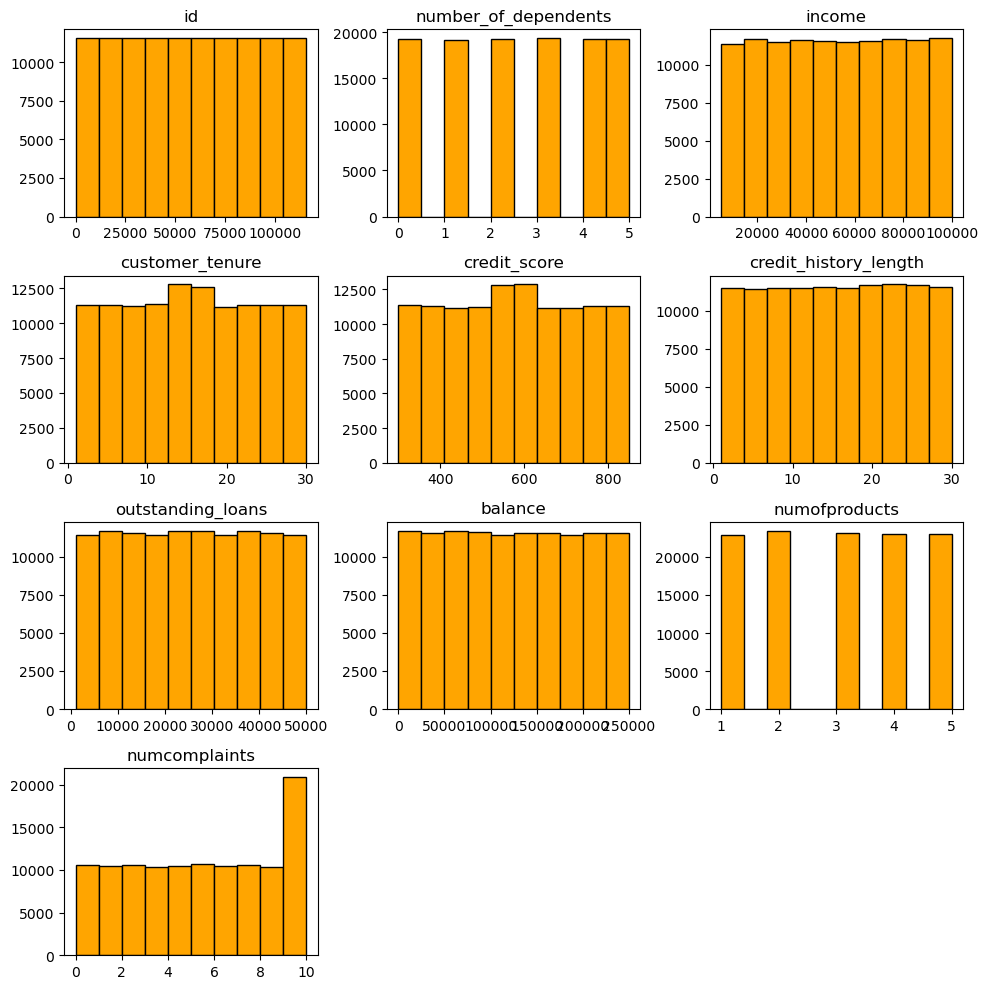

In [51]:
num_col.hist(figsize=(10, 10), grid=False, edgecolor='black', color = 'orange')
plt.tight_layout()

#### Explanatory Analysis 
- Distribution of Churn_Flag by Gender
- Distribution of Churn_Flag by Education_level
- Distribution of Churn_Flag by Marital_status
- Distribution of Churn_Flag by Customer_segment

In [56]:
data['churn_flag'] = data['churn_flag'].astype(str)

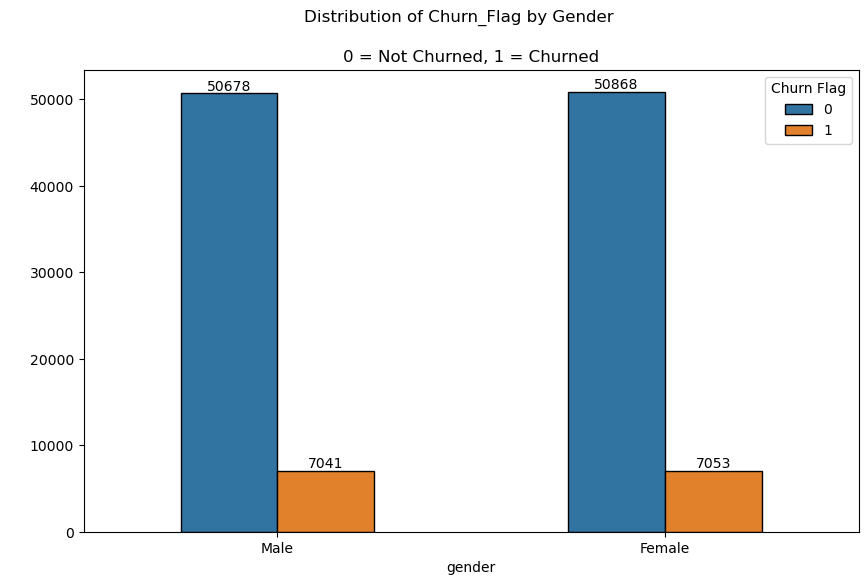

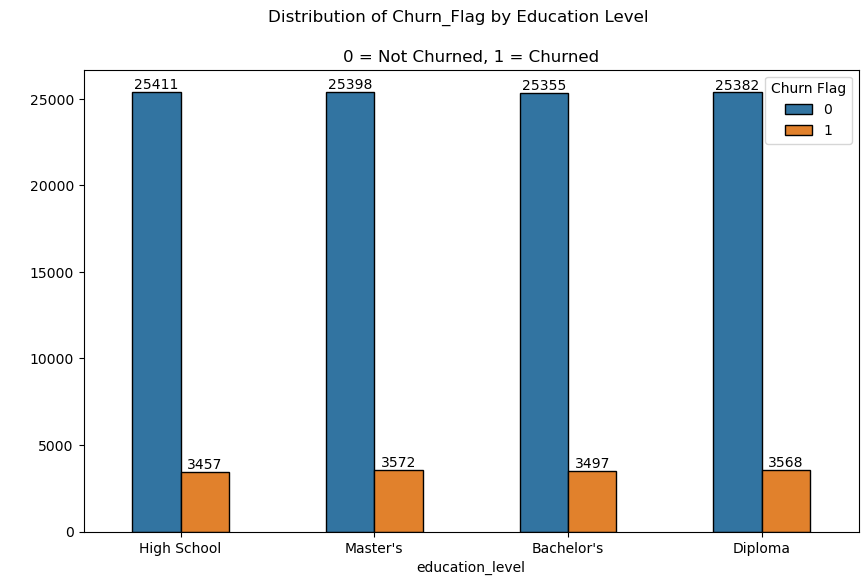

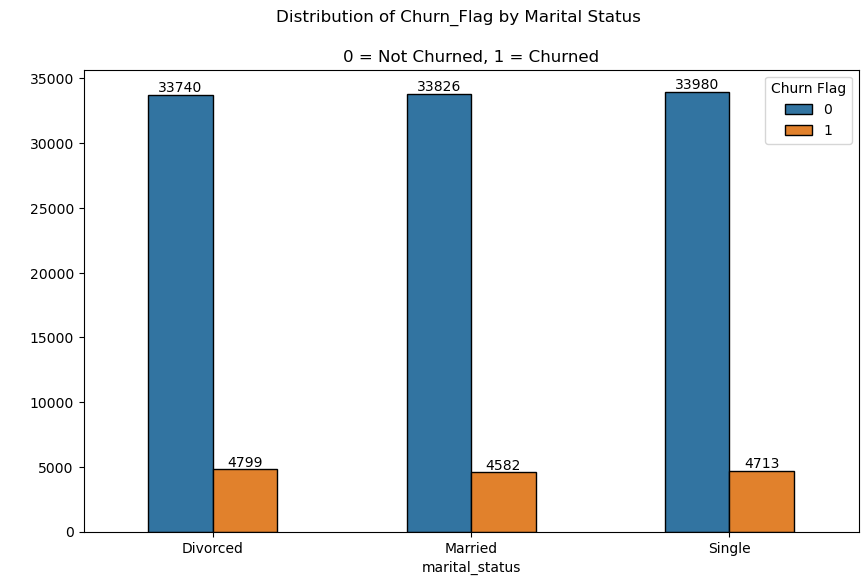

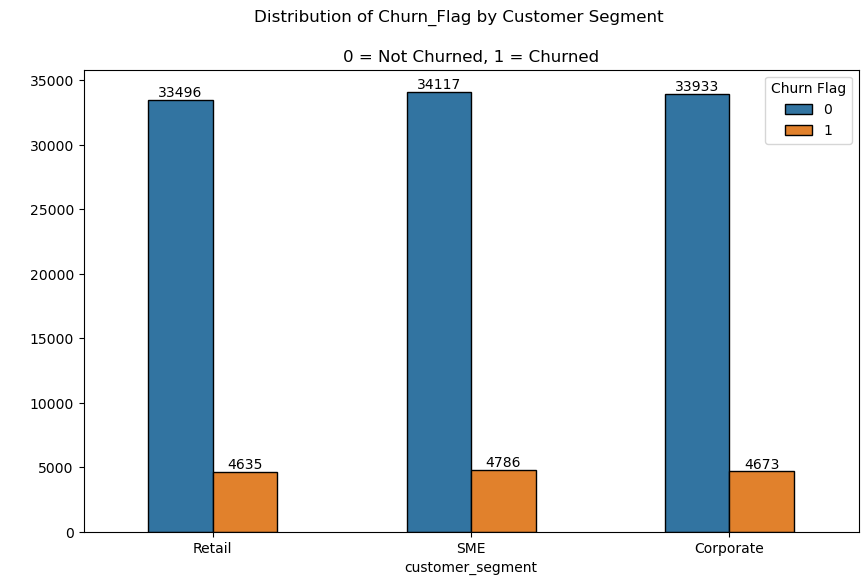

In [58]:
def plot_churn_distribution(data, column):

    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.countplot(data=data, x=column, hue='churn_flag', width=0.5, edgecolor='black')

    # Adding labels to bars
    for container in ax.containers:
        ax.bar_label(container)

    plt.title("0 = Not Churned, 1 = Churned")  # Main title
    plt.suptitle(f'Distribution of Churn_Flag by {column.replace("_", " ").title()}')  # Subtitle
    plt.ylabel(' ') 
    plt.legend(title="Churn Flag", loc='best')  # Legend placement
    plt.show()  # Show the plot

columns_to_plot = ['gender', 'education_level', 'marital_status', 'customer_segment'] # List of columns to visualize

for col in columns_to_plot:
    plot_churn_distribution(data, col) # Generate plots for each column

#### Observations 
From these insights, it’s clear that churn is not random—it follows specific trends.Women, highly educated customers, divorced individuals, and SMEs are the most at risk of leaving the bank. A call to action is needed.

### Feature Engineering 
- Feature Selection
- Feature Encoding (label and dummy encoder)

### Feature Selection
Why Is This Useful?
- Feature Selection: It helps us choose only the most important features, reducing unnecessary complexity.
- Improves Model Accuracy: By removing irrelevant features, our model focuses on the real predictors.
- Faster Computation: Less data means faster machine learning training.

In [63]:
data.columns # columns were made called, to create an X and Y Variable 

Index(['id', 'date_of_birth', 'gender', 'marital_status',
       'number_of_dependents', 'occupation', 'income', 'education_level',
       'customer_tenure', 'customer_segment',
       'preferred_communication_channel', 'credit_score',
       'credit_history_length', 'outstanding_loans', 'churn_flag',
       'churn_reason', 'balance', 'numofproducts', 'numcomplaints', 'city'],
      dtype='object')

In [65]:
X = data[['gender', 'marital_status', 'number_of_dependents',
       'occupation', 'income', 'education_level', 'customer_tenure',
       'customer_segment', 'preferred_communication_channel', 'credit_score',
       'credit_history_length', 'outstanding_loans','churn_reason', 'balance', 'numofproducts', 'numcomplaints', 'city']]

Y = data['churn_flag']

In [67]:
for col in X.select_dtypes(include = 'O'):
    X[col],_ = X[col].factorize()

In [69]:
scores = mutual_info_classif(X, Y, random_state = 42)

In [71]:
mutual_info_select = pd.Series(scores, index = X.columns)
best_features = mutual_info_select.sort_values(ascending = False)[0:11]

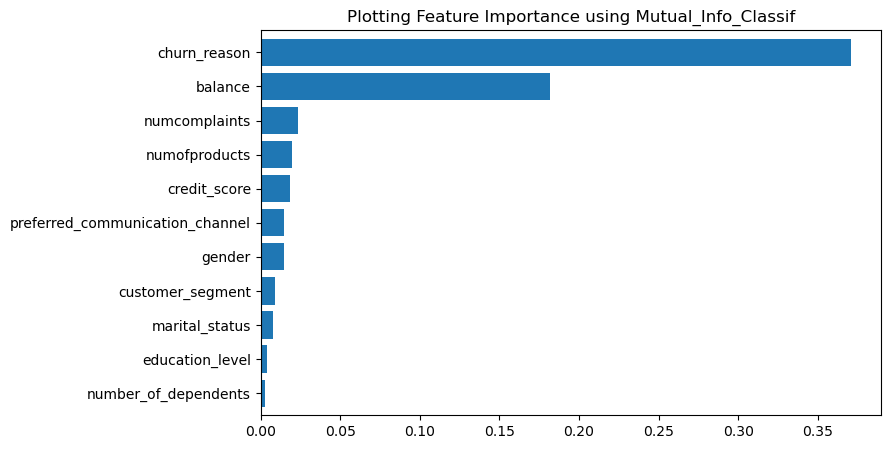

In [73]:
plt.figure(figsize = (8, 5))
best_features.sort_values(ascending = True).plot(kind = 'barh', width = 0.8)
plt.title('Plotting Feature Importance using Mutual_Info_Classif')
plt.show()

In [75]:
train_data = data[['gender', 'marital_status',
       'number_of_dependents', 'education_level',
       'customer_segment',
       'preferred_communication_channel', 'credit_score',
       'churn_reason', 'balance', 'numofproducts', 'numcomplaints']]
Y = data['churn_flag']

In [77]:
train_data

,gender,marital_status,number_of_dependents,education_level,customer_segment,preferred_communication_channel,credit_score,churn_reason,balance,numofproducts,numcomplaints
0,Male,Divorced,3,High School,Retail,Phone,397.00,No Reason,211359.05,1,0
1,Female,Married,1,High School,SME,Email,665.00,No Reason,30624.76,4,1
2,Female,Single,1,High School,Retail,Email,715.00,No Reason,111956.61,2,6
3,Female,Divorced,5,High School,Corporate,Phone,747.00,No Reason,201187.61,1,0
4,Female,Divorced,2,Master's,Corporate,Email,561.33,No Reason,60391.24,5,6
...,...,...,...,...,...,...,...,...,...,...,...
115635,Male,Divorced,2,Diploma,Corporate,Phone,350.00,Account Closure,20804.19,2,7
115636,Female,Single,3,High School,Corporate,Email,721.00,No Reason,10041.21,4,7
115637,Male,Married,4,Diploma,Retail,Email,773.00,No Reason,108833.43,1,4
115638,Female,Married,0,High School,Retail,Phone,584.00,No Reason,195548.32,5,6


### Feature Encoding
- Feature encoding converts categorical data into numerical format for machine learning models. Ordinal data (with a meaningful order, e.g., education level) is best encoded using Label Encoding to preserve ranking. Nominal data (unordered categories, e.g., gender) requires One-Hot or Dummy Encoding to avoid false numerical relationships. Encoding ensures correct data interpretation, prevents bias, and improves model performance.

In [80]:
train_data.select_dtypes(include = 'O')

,gender,marital_status,education_level,customer_segment,preferred_communication_channel,churn_reason
0,Male,Divorced,High School,Retail,Phone,No Reason
1,Female,Married,High School,SME,Email,No Reason
2,Female,Single,High School,Retail,Email,No Reason
3,Female,Divorced,High School,Corporate,Phone,No Reason
4,Female,Divorced,Master's,Corporate,Email,No Reason
...,...,...,...,...,...,...
115635,Male,Divorced,Diploma,Corporate,Phone,Account Closure
115636,Female,Single,High School,Corporate,Email,No Reason
115637,Male,Married,Diploma,Retail,Email,No Reason
115638,Female,Married,High School,Retail,Phone,No Reason


In [83]:
labelencoder = LabelEncoder()

In [85]:
train_data['education_level'] = labelencoder.fit_transform(train_data['education_level'])

In [87]:
for col in train_data.select_dtypes(include = 'O'):
    print(col)
    # train_data[col] = onehotencoder.fit_transform(train_data[col]).toarray()

gender
marital_status
customer_segment
preferred_communication_channel
churn_reason


In [89]:
encoded_data = pd.get_dummies(train_data, train_data.select_dtypes(include = 'O').columns).replace({True:1, False:0})

In [91]:
train_data = encoded_data

In [93]:
train_data

,number_of_dependents,education_level,credit_score,balance,numofproducts,numcomplaints,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,...,customer_segment_Corporate,customer_segment_Retail,customer_segment_SME,preferred_communication_channel_Email,preferred_communication_channel_Phone,churn_reason_Account Closure,churn_reason_Better Offers Elsewhere,churn_reason_No Reason,churn_reason_Relocation,churn_reason_Service Issues
0,3,2,397.00,211359.05,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,2,665.00,30624.76,4,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,1,2,715.00,111956.61,2,6,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,5,2,747.00,201187.61,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,2,3,561.33,60391.24,5,6,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,2,1,350.00,20804.19,2,7,0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
115636,3,2,721.00,10041.21,4,7,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
115637,4,1,773.00,108833.43,1,4,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
115638,0,2,584.00,195548.32,5,6,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


## Model Selection : Different ML Model were selected
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

The approach is try different machine learning algorithms on a common ground without hyperparameter tuning, so as to get the best performing model, everything being equal, and then tune the parameters of the best performing model to get a better performance still.

In [96]:
train_data

,number_of_dependents,education_level,credit_score,balance,numofproducts,numcomplaints,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,...,customer_segment_Corporate,customer_segment_Retail,customer_segment_SME,preferred_communication_channel_Email,preferred_communication_channel_Phone,churn_reason_Account Closure,churn_reason_Better Offers Elsewhere,churn_reason_No Reason,churn_reason_Relocation,churn_reason_Service Issues
0,3,2,397.00,211359.05,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,2,665.00,30624.76,4,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,1,2,715.00,111956.61,2,6,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,5,2,747.00,201187.61,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,2,3,561.33,60391.24,5,6,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,2,1,350.00,20804.19,2,7,0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
115636,3,2,721.00,10041.21,4,7,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
115637,4,1,773.00,108833.43,1,4,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
115638,0,2,584.00,195548.32,5,6,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [98]:
train_data.columns

Index(['number_of_dependents', 'education_level', 'credit_score', 'balance',
       'numofproducts', 'numcomplaints', 'gender_Female', 'gender_Male',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'customer_segment_Corporate',
       'customer_segment_Retail', 'customer_segment_SME',
       'preferred_communication_channel_Email',
       'preferred_communication_channel_Phone', 'churn_reason_Account Closure',
       'churn_reason_Better Offers Elsewhere', 'churn_reason_No Reason',
       'churn_reason_Relocation', 'churn_reason_Service Issues'],
      dtype='object')

In [100]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
115635    1
115636    0
115637    0
115638    0
115639    1
Name: churn_flag, Length: 115640, dtype: object

In [102]:
# splitting data for training model
X_train, X_test, y_train, y_test = train_test_split(train_data, Y, test_size = 0.2, random_state = 42)

In [104]:
models = {
    'Logistics_Regression': LogisticRegression(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(), 
    'Gradient_Boosting': GradientBoostingClassifier()
}

In [106]:
chart_dict = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n {model_name} Classification")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    chart_dict[model_name] = np.round(accuracy_score(y_test, y_pred), 2)
    print("-"*50)


 Logistics_Regression Classification
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.90      0.81      0.86      2827

    accuracy                           0.97     23128
   macro avg       0.94      0.90      0.92     23128
weighted avg       0.97      0.97      0.97     23128

[[20060   241]
 [  534  2293]]
--------------------------------------------------

 Decision_Tree Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20301
           1       1.00      1.00      1.00      2827

    accuracy                           1.00     23128
   macro avg       1.00      1.00      1.00     23128
weighted avg       1.00      1.00      1.00     23128

[[20301     0]
 [    0  2827]]
--------------------------------------------------

 Random_Forest Classification
              precision    recall  f1-score   support

           0       1.00    

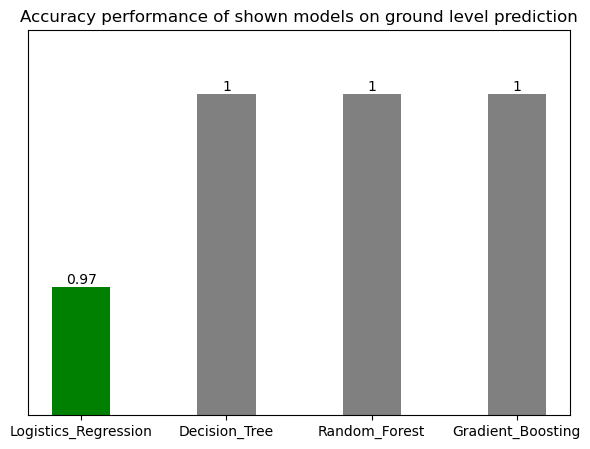

In [108]:
plt.figure(figsize=(7, 5))
chart = plt.bar(list(chart_dict.keys()), list(chart_dict.values()), width = 0.4, color=['g', 'grey', 'grey', 'grey'])
plt.bar_label(chart)
plt.ylim(0.95, 1.01)
plt.title("Accuracy performance of shown models on ground level prediction")
plt.yticks([])
plt.show()

### Hyperparameter Tuning

In [111]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 200, 300]
}

In [113]:
model = LogisticRegression()

In [137]:
random_search = RandomizedSearchCV(estimator = model, param_distributions=param_dist, scoring = 'accuracy', random_state = 42, cv = 3, n_jobs = 1)

In [139]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=42, scoring='accuracy')

In [141]:
print(random_search.best_params_)

{'penalty': 'l2', 'max_iter': 200}


In [143]:
np.round(random_search.best_score_, 2)

1.0

### Observation
The intial accuracy was 0.97 after the Hyperparameter tuning, accuracy = 1

### Deep Learning

In [153]:
model = Sequential([
    keras.Input(shape=(21,)),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')
])

In [155]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [173]:
# Convert y_train to integers (for classification tasks)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [177]:
model.fit(X_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 2s 224us/step - accuracy: 0.8741 - loss: 27.7182
Epoch 2/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 220us/step - accuracy: 0.8889 - loss: 10.1792
Epoch 3/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step - accuracy: 0.9098 - loss: 6.9942
Epoch 4/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 223us/step - accuracy: 0.9222 - loss: 4.0197
Epoch 5/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 221us/step - accuracy: 0.9307 - loss: 3.3466
Epoch 6/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - accuracy: 0.9474 - loss: 2.6466
Epoch 7/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 235us/step - accuracy: 0.9546 - loss: 2.0925
Epoch 8/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 221us/step - accuracy: 0.9577 - loss: 1.8541
Epoch 9/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step - accuracy: 0.9722 - loss: 0.6100
Epoch 10/10
5782/5782 ━━━━━━━━━━━━━━━━━━━━ 1s 223us/step - accuracy: 0.9711 - loss: 0.6023


The model was trained for 10 rounds (epochs) using small groups of 16 examples at a time (batch size). At the beginning, it had an accuracy of 87.41% and made a lot of mistakes, as shown by a high error value (loss = 27.71). As training continued, the model improved, reaching 97.11% accuracy with a much lower error (loss = 0.60) by the last round.

Further checks are needed to see if the model is overfitting (memorizing instead of truly learning) or if it needs adjustments to improve its performance on new data.

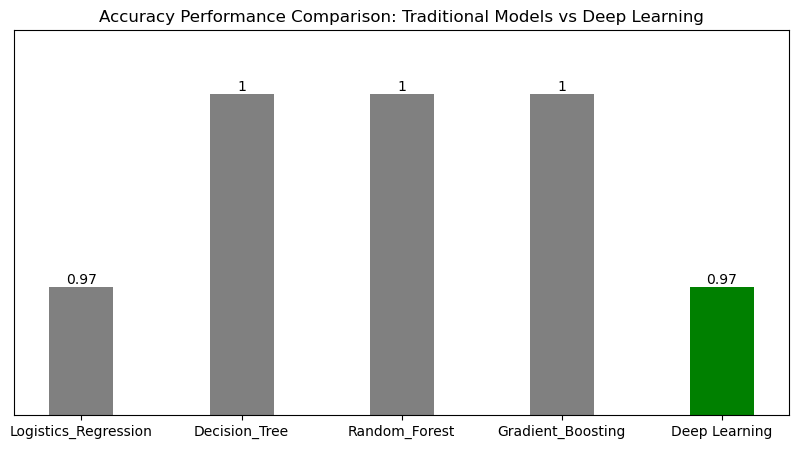

In [191]:
deep_learning_accuracy = 0.97  
chart_dict["Deep Learning"] = deep_learning_accuracy

# Extract updated model names and accuracy scores
model_names = list(chart_dict.keys())
accuracy_scores = list(chart_dict.values())

# colors defines (Deep Learning in green, others in grey)
colors = ['g' if model == "Deep Learning" else 'grey' for model in model_names]

# bar chart created
plt.figure(figsize=(10, 5))
chart = plt.bar(model_names, accuracy_scores, width=0.4, color=colors)
plt.bar_label(chart)

# Y-axis limits set for better visualization
plt.ylim(0.95, 1.01)

# Title and labels
plt.title("Accuracy Performance Comparison: Traditional Models vs Deep Learning")
plt.yticks([])  
# Show the plot
plt.show()
